## 1) Record the deformation of the first segment, with contraction time as 1 second

In [ ]:
# open the USB camera, show and record the video frame
import cv2
import numpy as np

# read from the camera via creating a VideoCapture object
SRvideo = cv2.VideoCapture(1)
if SRvideo.isOpened(): 
    print("The camera is available")

# save the video with the configuration of video encode format, fps, frame size,
frame_width = int(SRvideo.get(3))   # cv2.CAP_PROP_FRAME_WIDTH = 3   
frame_height = int(SRvideo.get(4))  # cv2.CAP_PROP_FRAME_HEIGHT = 4
SRvideo.set(cv2.CAP_PROP_FPS, 40)
print(SRvideo.get(5))           # cv2.CAP_PROP_FPD = 5

# shift the width and height considering the camera rotation
# FPS value is between 1 to 40 for the camera, the default value is 30
# for 10x5, 20x5, contraction time is 1s, while for 30x5, the contraction time is 2s
SRwri = cv2.VideoWriter('SRdeformation-10x5-T-P10-T1.avi',cv2.VideoWriter_fourcc(*'MJPG'), 40, (frame_width,frame_height))

while SRvideo.isOpened():
    ret, frame = SRvideo.read()
    if ret == True:  
        # rotate the frame, display and video save
        frame = cv2.rotate(frame, cv2.ROTATE_180)
        cv2.imshow('SRcrawling',frame)
        SRwri.write(frame)
        # Press Q on keyboard to stop recording
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break  

# Finally, release the capture and write object, then close windows
SRvideo.release()
SRwri.release()
cv2.destroyAllWindows() 

## 2) Record the deformation for the OCRnX range

In [ ]:
# open the USB camera, show and record the video frame
import cv2
import numpy as np

# read from the camera via creating a VideoCapture object
SRvideo = cv2.VideoCapture(1)
if SRvideo.isOpened(): 
    print("The camera is available")

# save the video with the configuration of video encode format, fps, frame size,
frame_width = int(SRvideo.get(3))   # cv2.CAP_PROP_FRAME_WIDTH = 3   
frame_height = int(SRvideo.get(4))  # cv2.CAP_PROP_FRAME_HEIGHT = 4
SRvideo.set(cv2.CAP_PROP_FPS, 40)

print(SRvideo.get(5))           # cv2.CAP_PROP_FPD = 5

# shift the width and height considering the camera rotation
# FPS value is between 1 to 40 for the camera, the default value is 30
SRwri = cv2.VideoWriter('SR-OCRnX-195-20x5-H-P30-T1.avi',cv2.VideoWriter_fourcc(*'MJPG'), 40, (frame_width,frame_height))

while SRvideo.isOpened():
    ret, frame = SRvideo.read()
    if ret == True:  
        # rotate the frame, display and video save
        frame = cv2.rotate(frame, cv2.ROTATE_180)
        cv2.imshow('SRcrawling',frame)
        SRwri.write(frame)
        # Press Q on keyboard to stop recording
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break  

# Finally, release the capture and write object, then close windows
SRvideo.release()
SRwri.release()
cv2.destroyAllWindows() 

## 3) Record the deformation for different waveform in head segment

In [1]:
# libs for Arduino board, live plot
import serial
import pandas as pda
import csv
from itertools import count
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.animation import FuncAnimation
# libs for camera display
import cv2
import PIL.Image, PIL.ImageTk
import time
# libs for GUI window
import tkinter

port = serial.Serial('COM3',9600, timeout = 1)

30.0


error: OpenCV(3.4.11) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-7h83o80f\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


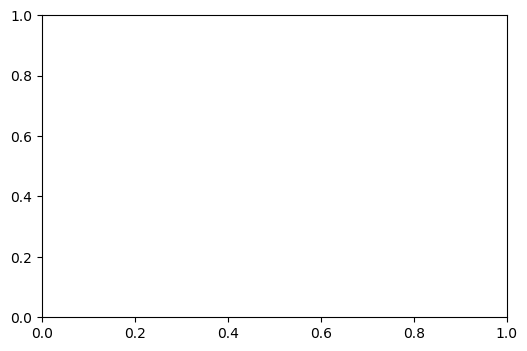

In [2]:
# some programs are deleted, in order to save time to match the main frequency (fps)
# here we only record the displacement video and sensor signal

# data pre-configuration
x,y1 = [],[]
index = count()

# data save pre-configuration
with open('SensorData_Saw3Test20x5-H-P-10.csv','w') as csv_file:
    fieldnames = ['Time','P1v']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     csv_writer.writeheader()

# animation function for live plot
def animate(i):
    # data refresh for live plot
    global x, y1
    P = port.readline().decode('ascii')
    Pv = P.split()
    PV = list(map(float,Pv))
    # value 0.05 = self.delay + interval in animation
    x.append(0.025*next(index))
    y1.append(PV[0])
    # constrain the points in live plot, about n/40 s
    x = x[-200:]
    y1 = y1[-200:]

    # figure plot part is deleted
    
    # data save
    with open('SensorData_Saw3Test20x5-H-P-10.csv','a') as csv_file:
        info = {
            'Time': x[-1],
            'P1v': PV[0]
        }
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writerow(info)  

# main class for the GUI display
class Application:
    def __init__(self, window, window_title, video_source=1):
        # open the HOZAN USB camera(1, the computer camera is 0)
        self.SRvid = SRVideoCapture(video_source)

        # configure the GUI window
        self.window = window
        self.window.title(window_title)
        # Text for video canvas
        L1 = tkinter.Label(self.window, text = 'Video Record', font = 'Times 18 bold')
        L1.grid(row = 0, column = 0, sticky = tkinter.W)
        # Create a canvas that can fit the above video source size
        self.canvas = tkinter.Canvas(window, width = self.SRvid.width, height = self.SRvid.height)         
        self.canvas.grid(row = 1, column = 0)     
        # Button that lets the user take a snapshot
#         self.btn_snapshot=tkinter.Button(window, text="Snapshot", font = 'Times 16 bold', width=50, command=self.snapshot1)
#         self.btn_snapshot.grid(row = 2, column = 0)
        
        # Text for signal plot
#         L2 = tkinter.Label(self.window, text = 'Sensor Signal', font = 'Times 18 bold')
#         L2.grid(row = 0, column = 1, sticky = tkinter.W)
# #         # configure for the figures attached to the GUI window
#         style.use('fivethirtyeight')
        self.fig = plt.figure(figsize = (6,4),dpi = 100)
        ax = self.fig.add_subplot(111)
        canvas = FigureCanvasTkAgg(self.fig, master = self.window)
        canvas.get_tk_widget().grid(row = 1, column = 1, columnspan = 2)      
        # the interval is related to the x value configured
        ani = FuncAnimation(self.fig, animate, interval = 2)
#         self.btn_snapshot=tkinter.Button(window, text="Snapshot", font = 'Times 16 bold', width=50, command=self.snapshot2)
#         self.btn_snapshot.grid(row = 2, column = 1, columnspan = 2)
        
        # After it is called once, the update method will be automatically called every delay milliseconds
        self.delay =3
        self.update()
        self.window.mainloop()
    
    # update GUI window
    def update(self):
        # Get a frame from the video source
        ret, frame = self.SRvid.get_frame()
        if ret:
            self.photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(frame))
            self.canvas.create_image(0, 0, image = self.photo, anchor = tkinter.NW)
        self.SRvid.SRwri.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        self.window.after(self.delay, self.update)
    # snapshot during video record
    def snapshot1(self):
        # Get a frame from the video source
        ret, frame = self.SRvid.get_frame()
        if ret:
            cv2.imwrite("SRcrawling-" + time.strftime("%d-%m-%Y-%H-%M-%S") + ".jpg", cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    # snapshot during sensor signal record
    def snapshot2(self):
        self.fig.savefig('SRpressures.jpg')
        
# Video management class
class SRVideoCapture:
    def __init__(self, video_source=1):
        self.SRvid = cv2.VideoCapture(video_source)
        if not self.SRvid.isOpened():
            print('Cannot read the camera')

        # the size of HOZAN USB camera is 640*480
        self.width = int(self.SRvid.get(3))   # cv2.CAP_PROP_FRAME_WIDTH = 3
        self.height = int(self.SRvid.get(4))  # cv2.CAP_PROP_FRAME_HEIGHT = 4
        self.SRvid.set(cv2.CAP_PROP_FPS, 30)  # cv2.CAP_PROP_FPD = 5
        print(self.SRvid.get(5))
        # shift the height and width considering the camera rotation        
        self.SRwri = cv2.VideoWriter('SRcrawling_Saw3Test20x5-H-P-10-FPS30.avi', cv2.VideoWriter_fourcc(*'MJPG'), 30, (self.width, self.height))
    
    # frame configuration
    def get_frame(self):
        ret, frame = self.SRvid.read()
        frame = cv2.rotate(frame, cv2.ROTATE_180)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if ret:
            return (ret, frame)
        else:
            return (ret, None)

    # Release the video source when the object is destroyed
    def __del__(self):
        if self.SRvid.isOpened():
            self.SRvid.release()
            self.SRwri.release()

# Create a window and pass it to the Application object
Application(tkinter.Tk(), "SRcrawling")

In [3]:
port.close()

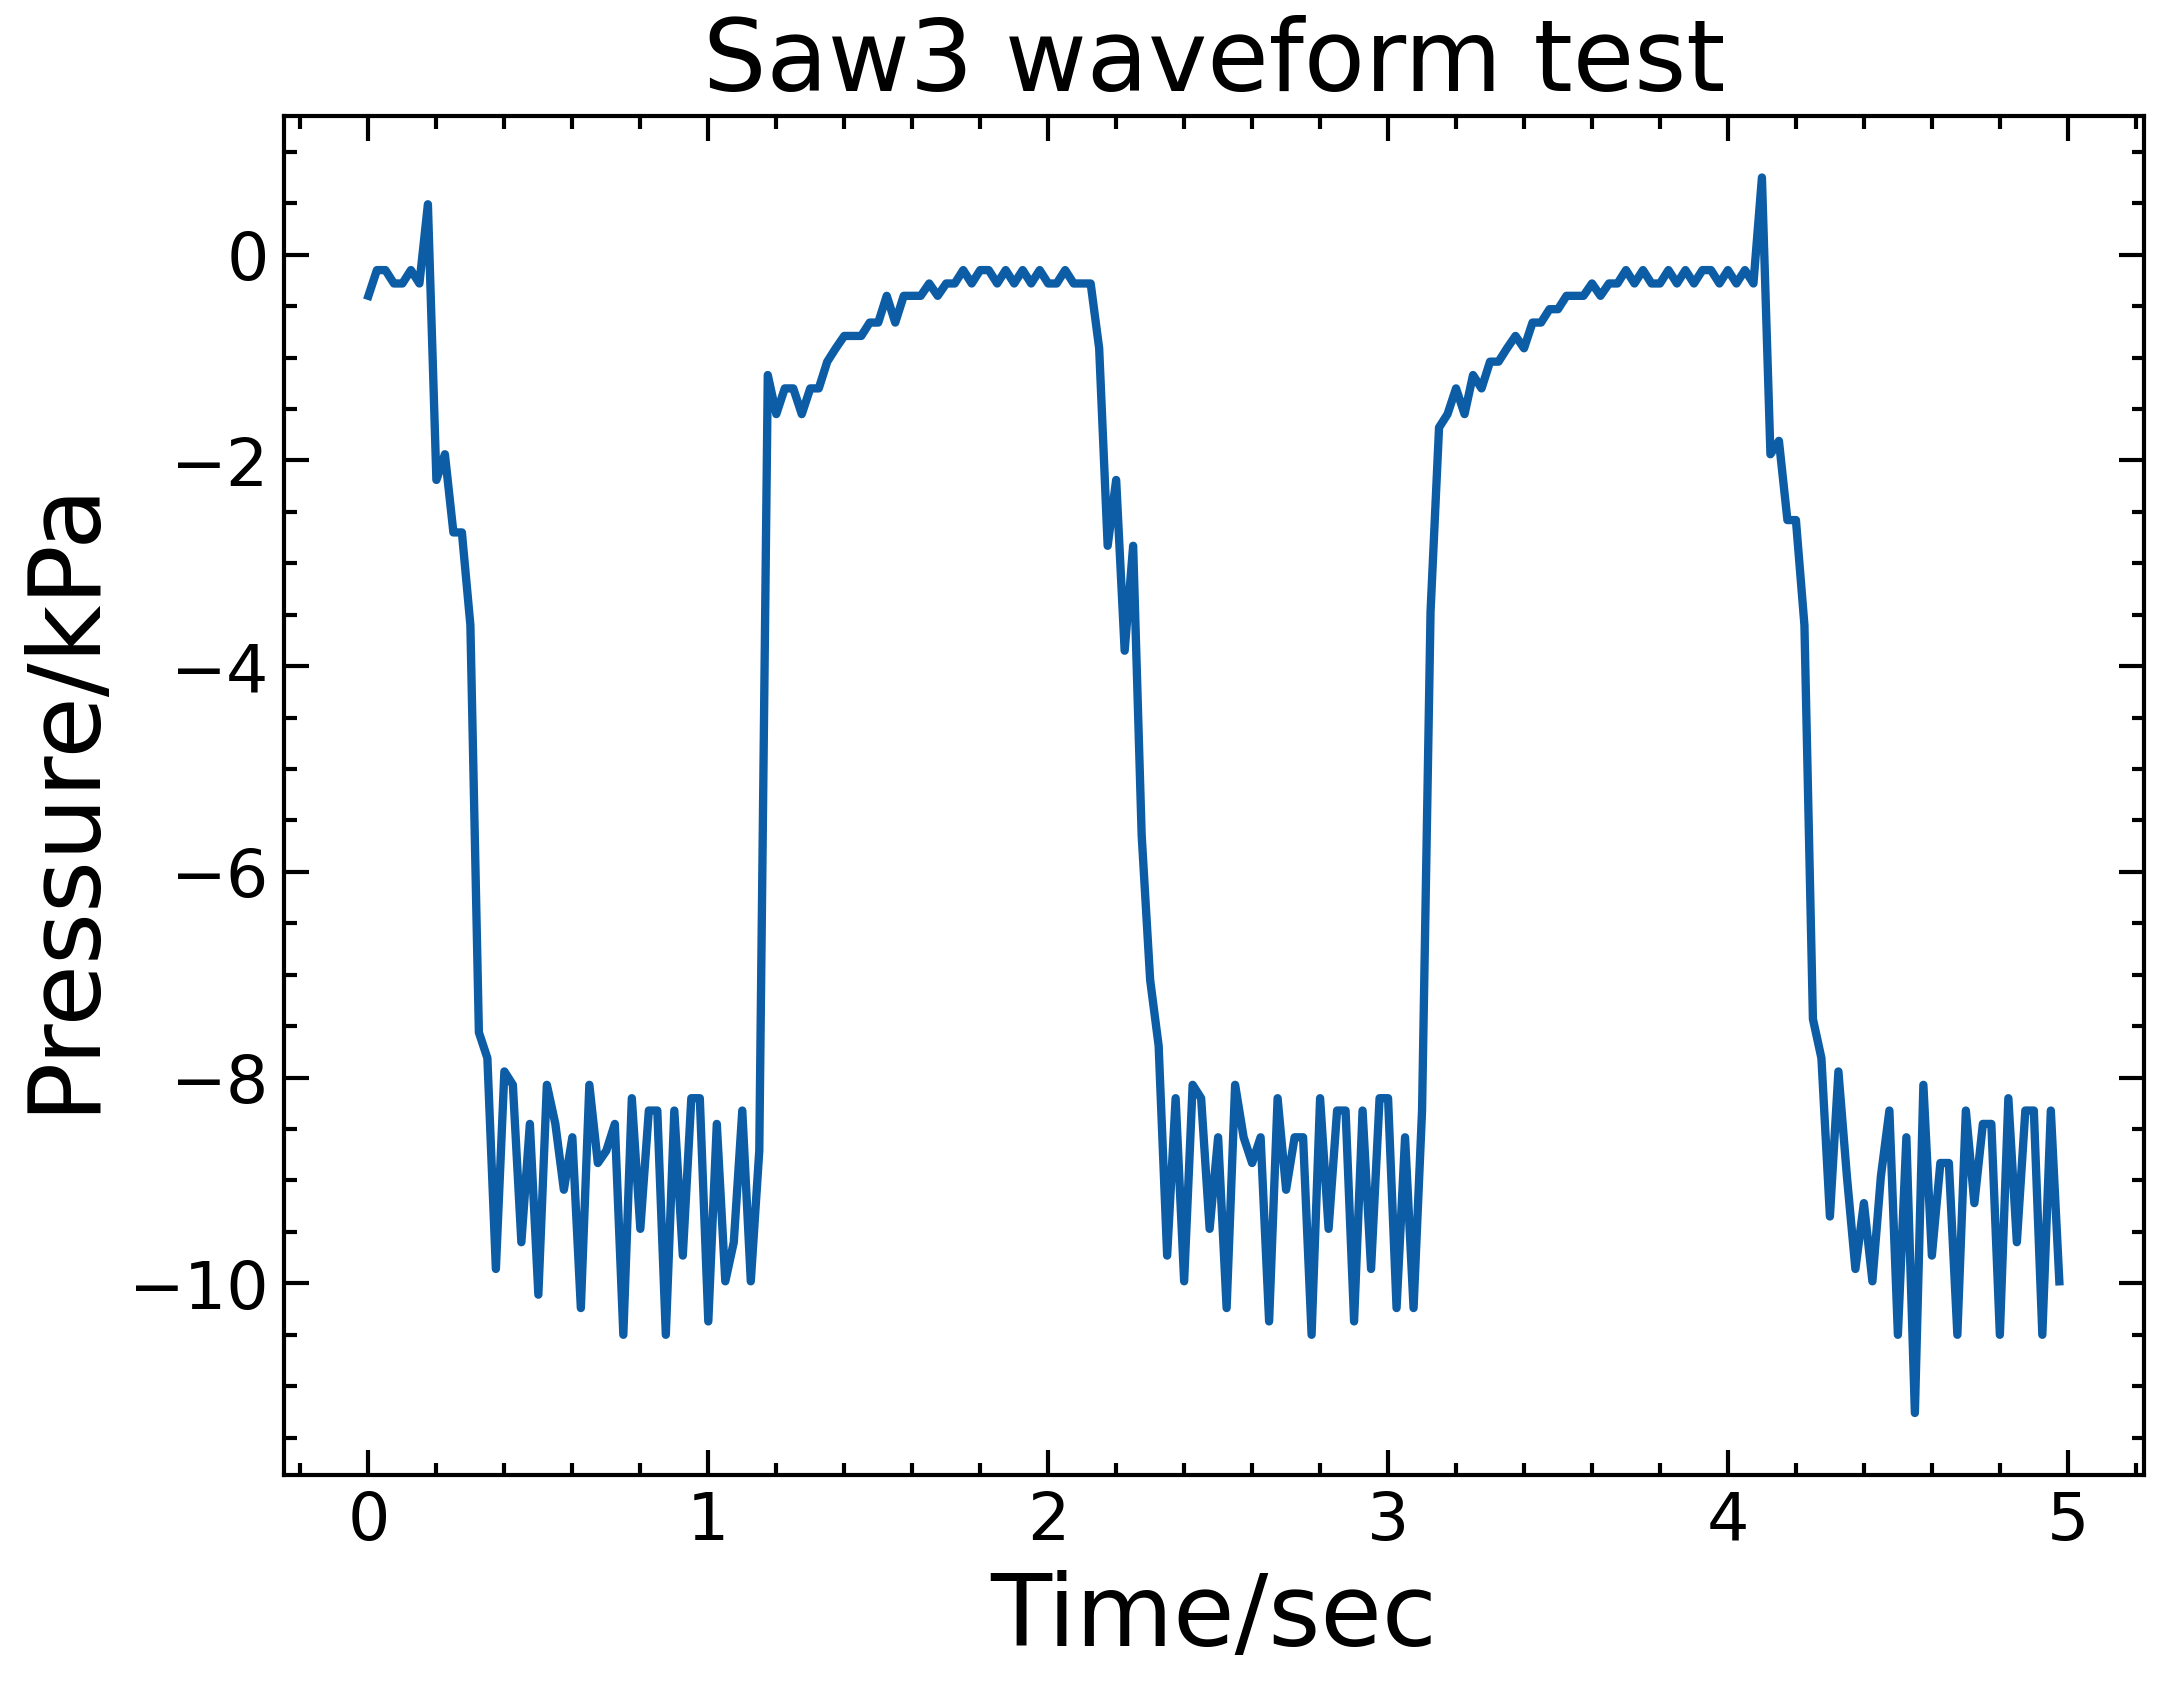

In [51]:
# figure plot for these displacement and sensor signal

import matplotlib.pyplot as plt
import pandas as pd

# 1) figure plot for the sensor signal
data1 = pd.read_csv('SR-wavetest/SensorData_Saw3Test20x5-H-P-10.csv', index_col=None, header = None)

time1 = list(map(float,data1[:200][0]))
dis1 = list(map(float,data1[:200][1]))
# dis1 = [(dis1[0]-i)*5/18.25 for i in dis1]

with plt.style.context(['science','notebook','no-latex']):
    plt.figure()
    plt.plot(time1,dis1)
    plt.xlabel('Time/sec',fontsize = 24)
    plt.ylabel('Pressure/kPa',fontsize = 24)
    plt.title('Saw3 waveform test',fontsize = 24)
    plt.rcParams['savefig.dpi'] = 300 #图片像素
    plt.rcParams['figure.dpi'] = 300
    plt.savefig('SensorData_Saw3Test20x5-H-P-10.png')
    plt.show()

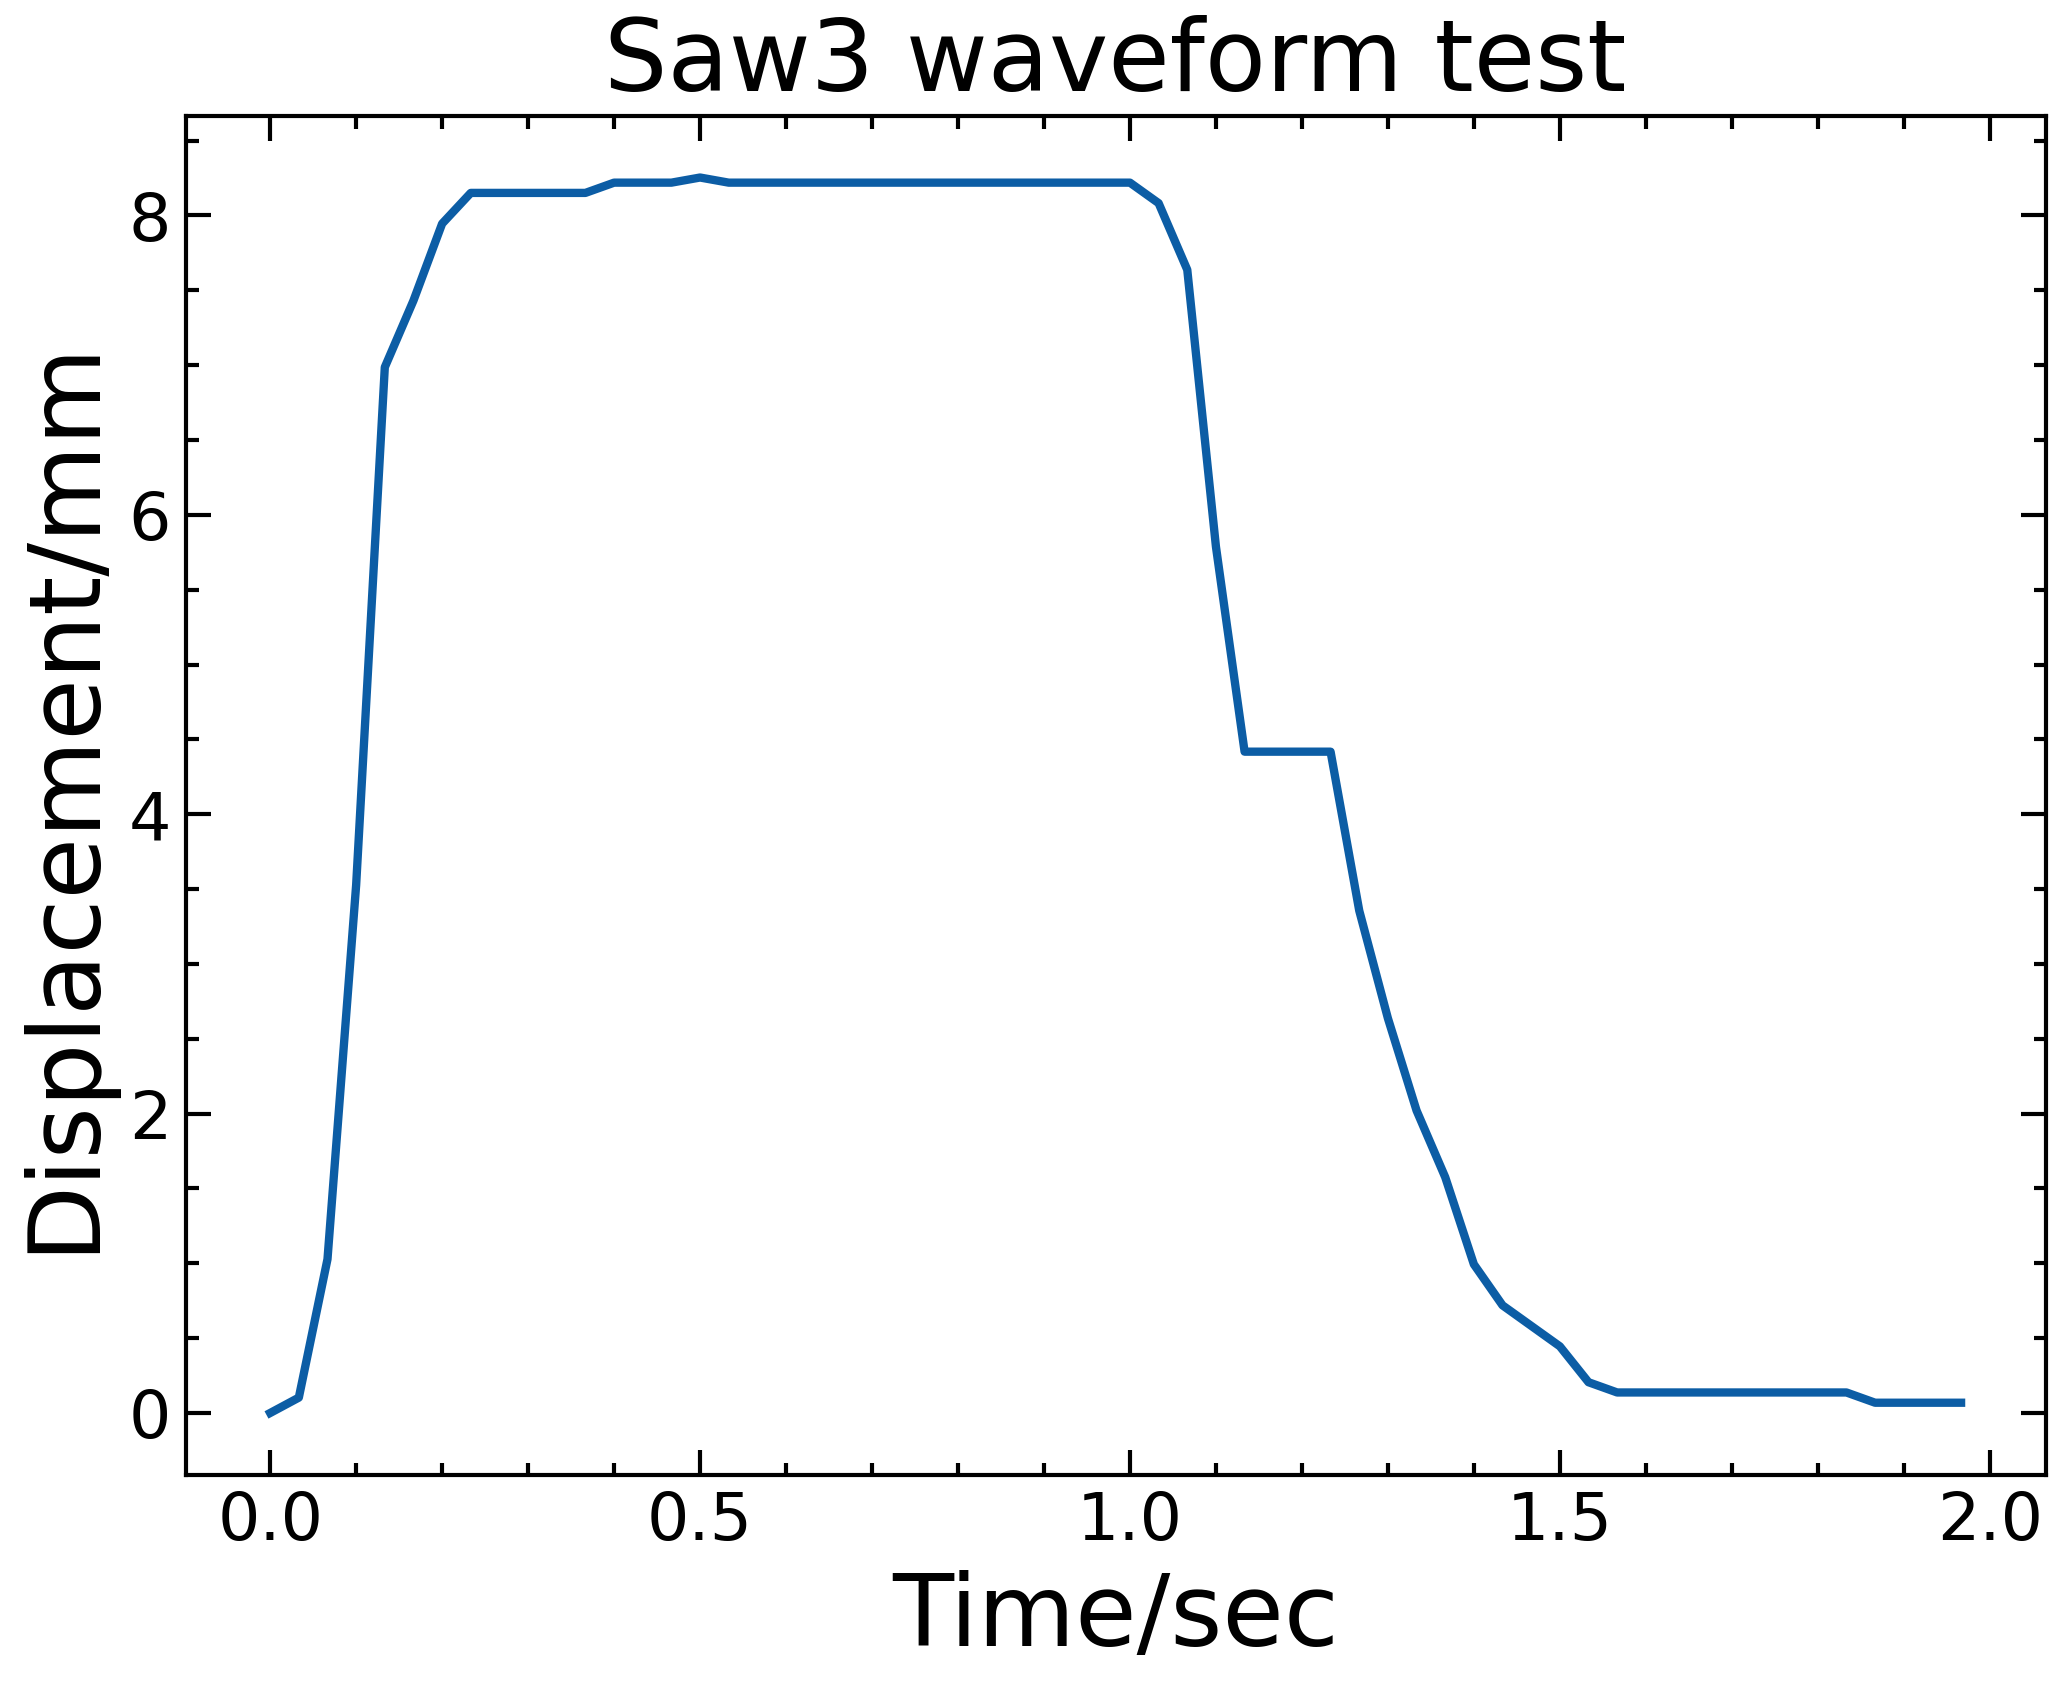

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# 2) figure plot for the segmental displacement
data1 = pd.read_csv('SR-wavetest/SRcrawling_Saw3Test20x5-H-P-10-FPS30.csv', index_col=None, header = None)

t = list(range(60))
t = [i/30 for i in t]
# data conversion from str to float list, then normalized into mm dimension (18.25 ==5mm)
dis1 = list(map(float,data1[1:][1]))
dis1 = [(dis1[0]-i)*5/18.25 for i in dis1]

with plt.style.context(['science','notebook','no-latex']):
    plt.figure()
    plt.plot(t,dis1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.xlabel('Time/sec', fontsize=24)
    plt.ylabel('Displacement/mm', fontsize=24)
    plt.title('Saw3 waveform test', fontsize=24)
    plt.rcParams['savefig.dpi'] = 300 #图片像素
    plt.rcParams['figure.dpi'] = 300
    plt.savefig('SRcrawling_Saw3Test20x5-H-P-10-FPS30.png')
    plt.show()